# MNIST

## Loading  and viewing the Dataset

In [3]:
%matplotlib inline

In [33]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
import seaborn as sns
import pandas as pd

In [5]:
digits=load_digits()

sklearn.utils.Bunch

In [2]:
digits.data.shape

(1797, 64)

In [40]:
digits.images.shape

(1797, 8, 8)

In [18]:
m = digits.images.shape[0]
x = digits.images.shape[1]

print(f"Number of samples in dataset: {m}")
print(f"Number of parameters per sample: {x * x}")

Number of samples in dataset: 1797
Number of parameters per sample: 64


In [14]:
y = digits.target_names
print(f"Class Names: {y}")

Class Names: [0 1 2 3 4 5 6 7 8 9]


In [57]:
def display_data(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
    fig.suptitle( "MNIST Set")
    # r = np.random.randint(X.shape[0])
    # images_and_labels = [(X[r, :].reshape(8, 8), Y[r :]) for i in range(10)]

    # for ax, (img, label) in zip(ax[0, :], images_and_labels):
    #     ax.set_title(f"Label: {label}")
    #     ax.imshow(img, cmap=plt.cm.gray_r)
    #     plt.setp(ax.get_xticklabels(), visible=False)
    #     plt.setp(ax.get_yticklabels(), visible=False)

    for i in range(5):
        for j in range(5):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8, 8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap=plt.cm.gray_r) # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

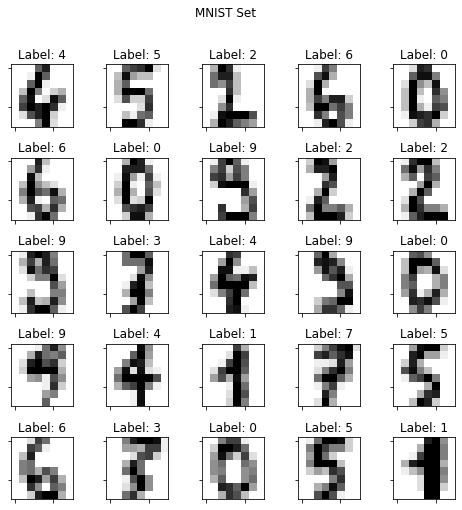

In [58]:
display_data(digits.images, digits.target)

## Split data into Training and Testing Dataset

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, shuffle=True)

## Accuracy Function


In [60]:
def accuracy(y_pred, y_test):
    print("accuracy score:",accuracy_score(y_test, y_pred))
    print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
    print("f1 score:", f1_score(y_test, y_pred, average='macro'))
    # using heatmat to plot accuracy
    a=np.array(y_pred).reshape(-1,1)
    b=np.array(y_test).reshape(-1,1)
    df=pd.DataFrame(np.append(a,b,axis=1))
    df.columns=["predicted_vals","true_vals"]
    cor = df.corr()
    sns.heatmap(cor)
    #to use scatter plot uncomment the below given code
    #plt.scatter(y_test,y_pred)
    plt.show()

## 1) Using RandomForestClassifier from sklearn.ensemble to generate, fit the model and predict the output.


In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(x_train, y_train)
y_pred_randf=model.predict(x_test)

## 2) Using Naive Bayes Classifier from sklearn.ensemble to generate, fit the model and predict the output


In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_naiveBayes = gnb.fit(x_train, y_train).predict(x_test)

## 3) Using Support vector Machine from sklearn.ensemble to generate, fit the model and predict the output


In [13]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred_SVM=clf.predict(x_test)


C:\Users\Juhi Kamdar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 4) Using Stochastic Gradient Descent from sklearn.ensemble to generate, fit the model and predict the output


In [14]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x_train, y_train)
SGDClassifier(max_iter=5)
y_pred_SGD=clf.predict(x_test)

C:\Users\Juhi Kamdar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


## 5) Using KNN from sklearn.ensemble to generate, fit the model and predict the output


In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train,y_train)
y_pred_KNN=neigh.predict(x_test)

## Checking the results of all the methods

Random Forest Accuracy
accuracy score: 0.6844444444444444
confusion matrix:
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 12  2  1 12  2  7  8  3  2]
 [ 1  2 31  5  0  0  6  1  1  0]
 [ 1  0  1 41  0  1  1  2  0  1]
 [ 2  0  0  0 38  1  0  0  0  0]
 [ 4  0  0  5  2 39  1  2  1  1]
 [ 2  0  0  0  2  0 37  0  0  0]
 [ 0  1  0  0  3  1  0 37  0  0]
 [ 2  1 11  5  3  0  2  9 13  0]
 [ 0  4  0  8  1  1  1  5  1 22]]
f1 score: 0.6642764950401785


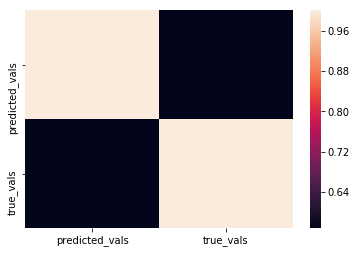


Naive Bayes Accuracy
accuracy score: 0.8577777777777778
confusion matrix:
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  3  1  2  1]
 [ 0  1 31  2  0  0  0  0 13  0]
 [ 0  1  0 36  0  2  0  1  6  2]
 [ 0  0  0  0 39  0  0  1  1  0]
 [ 0  0  0  2  0 49  0  0  3  1]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  1  0  0 41  0  0]
 [ 0  1  0  0  0  1  0  4 40  0]
 [ 0  2  0  1  1  1  0  7  2 29]]
f1 score: 0.8618676682121231


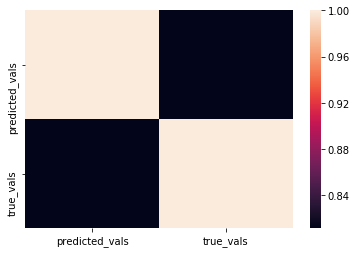


Support Vector Machine Accuracy
accuracy score: 0.4955555555555556
confusion matrix:
 [[26  0  0  0  0  0  0  0  0 12]
 [ 0 14  0  0  0  0  0  0  0 35]
 [ 0  0 16  0  0  0  0  0  0 31]
 [ 0  0  0 29  0  0  0  0  0 19]
 [ 0  0  0  0 35  0  0  0  0  6]
 [ 0  0  0  0  0  6  0  0  0 49]
 [ 0  0  0  0  0  0 32  0  0  9]
 [ 0  0  0  0  0  0  0 18  0 24]
 [ 0  0  0  0  0  0  0  0  4 42]
 [ 0  0  0  0  0  0  0  0  0 43]]
f1 score: 0.5547374360835768


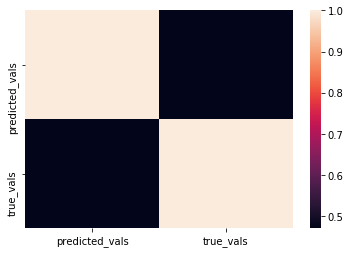


Stochastic Gradient Decent Accuracy
accuracy score: 0.9222222222222223
confusion matrix:
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  1  4  0  2  2]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 40  0  0  1  0  6  0]
 [ 0  0  0  0 40  0  0  0  1  0]
 [ 0  0  0  0  0 50  0  0  2  3]
 [ 0  0  0  0  1  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 39  3  0]
 [ 0  0  1  0  0  2  0  0 43  0]
 [ 0  0  0  0  0  1  0  0  4 38]]
f1 score: 0.9260829698102133


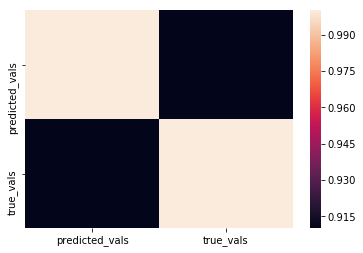


 KNN Accuracy
accuracy score: 0.9866666666666667
confusion matrix:
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  3  0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  1  0  0  1 41]]
f1 score: 0.9872376649429648


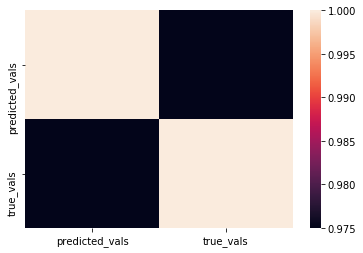

In [21]:
print("Random Forest Accuracy")
accuracy(y_pred_randf,y_test)
print("\nNaive Bayes Accuracy")
accuracy(y_pred_naiveBayes,y_test)
print("\nSupport Vector Machine Accuracy")
accuracy(y_pred_SVM,y_test)
print("\nStochastic Gradient Decent Accuracy")
accuracy(y_pred_SGD,y_test)
print("\n KNN Accuracy")
accuracy(y_pred_KNN,y_test)